## Setup and Initialization

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
from faker import Faker
import random
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Initialize Faker
fake = Faker()


##  Data Generation (ETL)

In [24]:
# Helper functions to generate realistic data
def generate_customers(num_customers):
    customers = []
    for _ in range(num_customers):
        customers.append([
            fake.uuid4(),  # id
            fake.random_element(elements=("Email", "Social Media", "Direct", "Referral")),  # marketing_channel
            fake.random_element(elements=("Online", "Phone", "In-Store")),  # account_creation_method
            fake.country_code(),  # country_code
            random.choices([0, 1], weights=[0.7, 0.3], k=1)[0],  # loyalty_program
            fake.date_between(start_date='-5y', end_date='today')  # created_on
        ])
    return customers

def generate_orders(num_orders, customer_ids, product_ids):
    orders = []
    for _ in range(num_orders):
        purchase_date = fake.date_between(start_date='-1y', end_date='today')
        orders.append([
            random.choice(customer_ids),  # customer_id
            fake.uuid4(),  # id
            purchase_date,  # purchase_ts
            random.choice(product_ids),  # product_id
            fake.word(),  # product_name
            fake.random_element(elements=("USD", "EUR", "GBP")),  # currency
            round(random.uniform(10, 1000), 2),  # local_price
            round(random.uniform(10, 1000), 2),  # usd_price
            fake.random_element(elements=("Web", "Mobile App", "In-Store"))  # purchase_platform
        ])
    return orders

def generate_order_status(order_ids):
    order_status = []
    for order_id in order_ids:
        purchase_date = fake.date_between(start_date='-1y', end_date='today')
        ship_date = fake.date_between_dates(date_start=purchase_date)
        delivery_date = fake.date_between_dates(date_start=ship_date)
        refund_date = fake.date_between_dates(date_start=delivery_date) if random.random() < 0.1 else None
        order_status.append([
            order_id,  # order_id
            purchase_date,  # purchase_ts
            ship_date,  # ship_ts
            delivery_date,  # delivery_ts
            refund_date  # refund_ts
        ])
    return order_status

def generate_geo_lookup(num_countries):
    geo_lookup = []
    countries = list(set(fake.country() for _ in range(num_countries)))
    for country in countries:
        geo_lookup.append([
            country,  # country
            fake.state()  # region
        ])
    return geo_lookup

# Generate data
num_customers = 1000
num_orders = 5000
num_products = 100

customer_data = generate_customers(num_customers)
order_data = generate_orders(num_orders, [c[0] for c in customer_data], [fake.uuid4() for _ in range(num_products)])
order_status_data = generate_order_status([o[1] for o in order_data])
geo_lookup_data = generate_geo_lookup(50)

# Convert to DataFrames
df_customers = pd.DataFrame(customer_data, columns=["id", "marketing_channel", "account_creation_method", "country_code", "loyalty_program", "created_on"])
df_orders = pd.DataFrame(order_data, columns=["customer_id", "id", "purchase_ts", "product_id", "product_name", "currency", "local_price", "usd_price", "purchase_platform"])
df_order_status = pd.DataFrame(order_status_data, columns=["order_id", "purchase_ts", "ship_ts", "delivery_ts", "refund_ts"])
df_geo_lookup = pd.DataFrame(geo_lookup_data, columns=["country", "region"])

# Save to Excel
file_path = "realistic_synthetic_ecommerce_data.xlsx"
with pd.ExcelWriter(file_path) as writer:
    df_customers.to_excel(writer, sheet_name="customers", index=False)
    df_orders.to_excel(writer, sheet_name="orders", index=False)
    df_order_status.to_excel(writer, sheet_name="order_status", index=False)
    df_geo_lookup.to_excel(writer, sheet_name="geo_lookup", index=False)

## EDA

Index(['customer_id', 'id_order', 'purchase_ts', 'product_id', 'product_name',
       'currency', 'local_price', 'usd_price', 'purchase_platform', 'order_id',
       'order_purchase_ts', 'ship_ts', 'delivery_ts', 'refund_ts',
       'id_customer', 'marketing_channel', 'account_creation_method',
       'country_code', 'loyalty_program', 'created_on'],
      dtype='object')


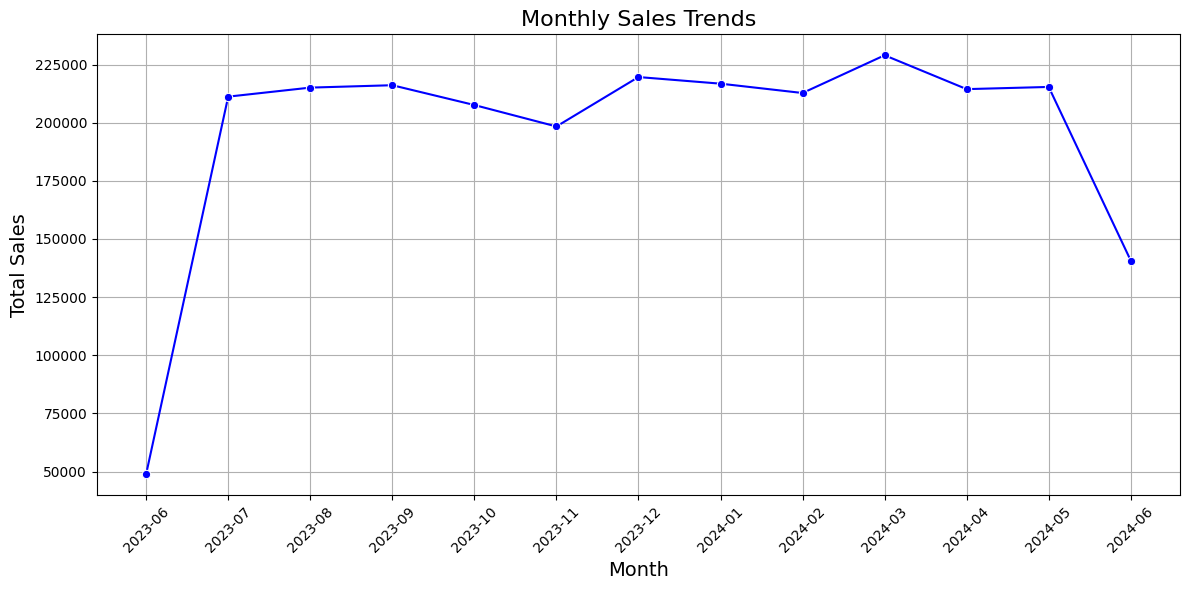

C:\Users\catab\AppData\Local\Temp\ipykernel_12968\1593787218.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='product_name', y='total_sales', palette='viridis')


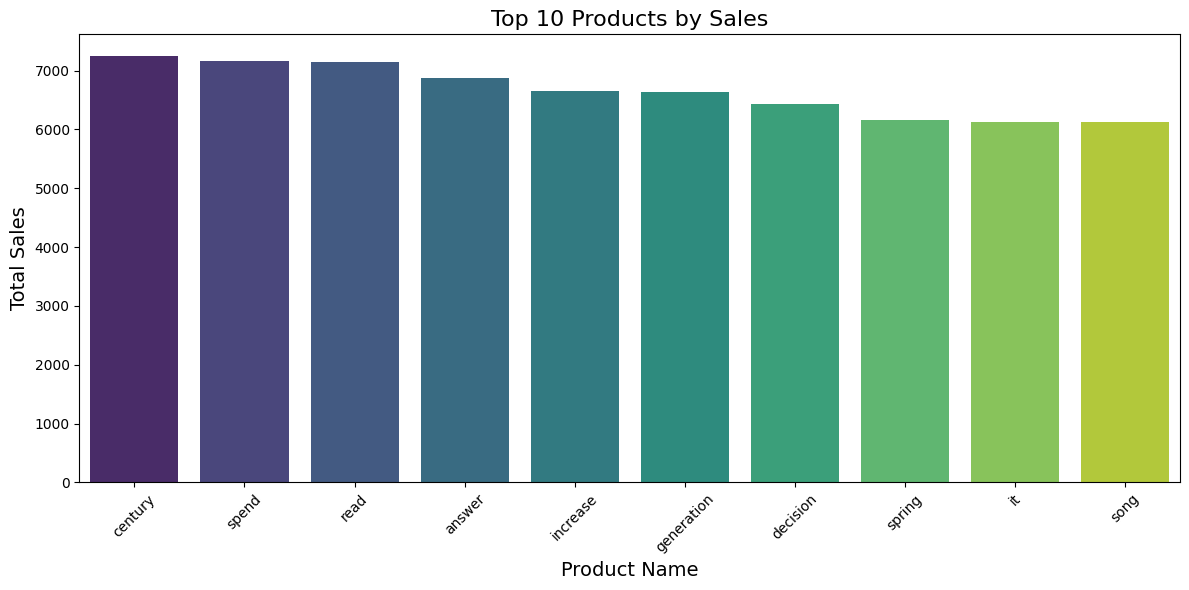

C:\Users\catab\AppData\Local\Temp\ipykernel_12968\1593787218.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loyalty_program_insights, x='loyalty_program', y='total_sales', palette='coolwarm')


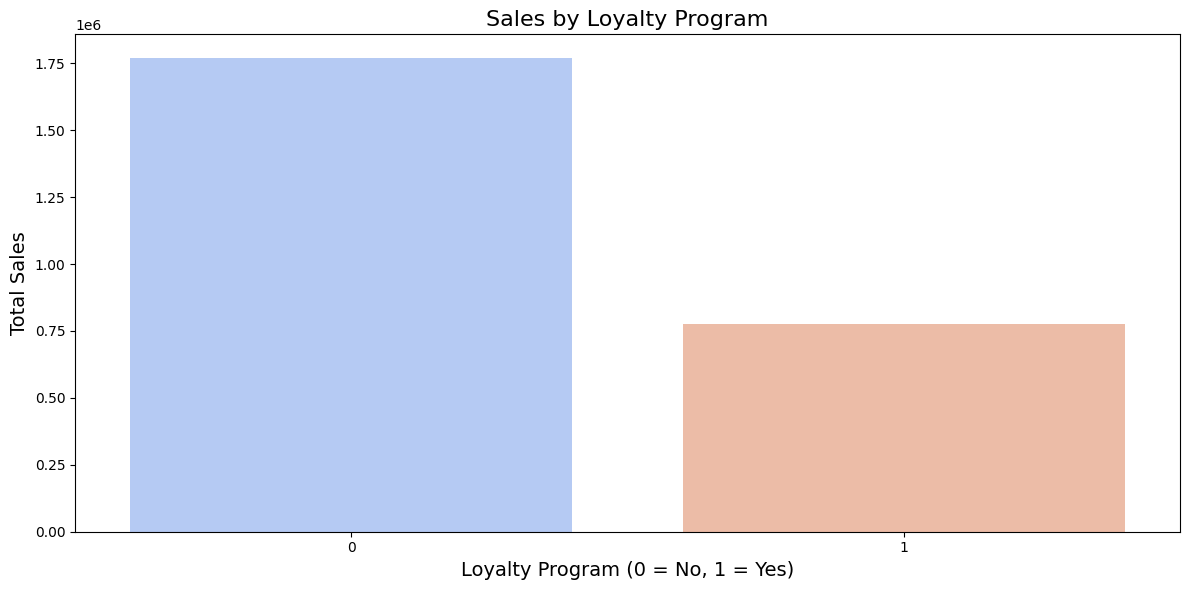

C:\Users\catab\AppData\Local\Temp\ipykernel_12968\1593787218.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=refund_rates, x='is_refunded', y='total_sales', palette='magma')


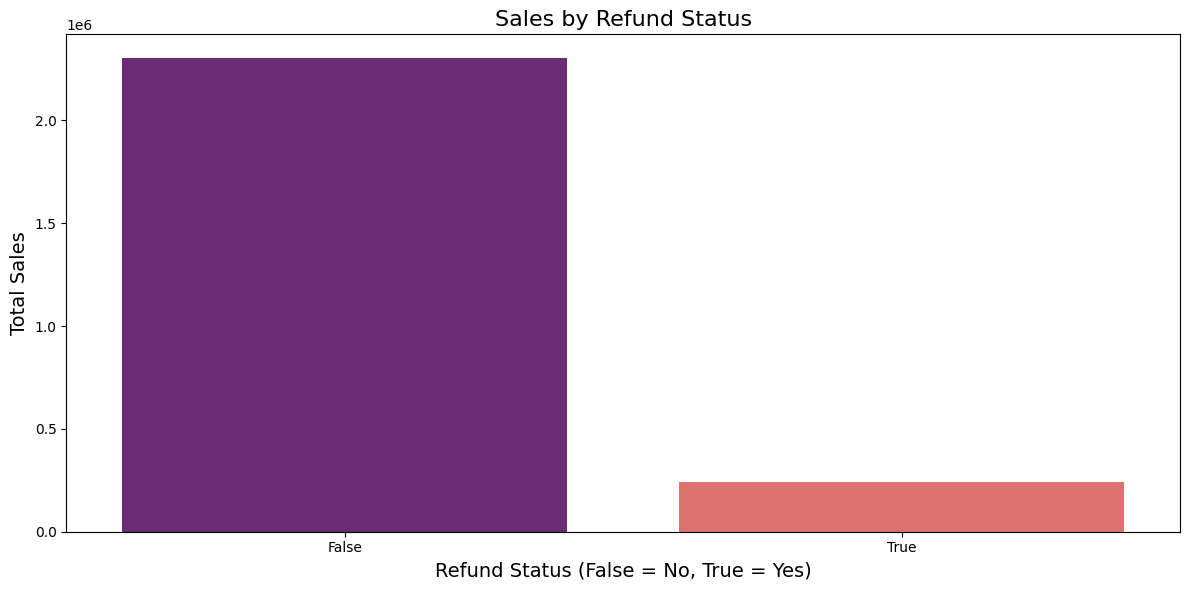

C:\Users\catab\AppData\Local\Temp\ipykernel_12968\1593787218.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='customer_id', y='purchase_count', palette='Set2')


Top 10 Customers by Purchase Count:
                              customer_id  purchase_count  total_spent  \
232  3ec87aac-3c06-4045-b8d5-93ed1938187d              14      6599.18   
583  9726ca87-60d4-4565-be1f-239786c0733b              13      7157.91   
744  bda38240-0b4b-494b-b67d-c27d272f6195              12      5534.72   
737  bc514e91-391c-40df-b086-e007011c4e5c              12      8241.39   
729  baa6652e-4f98-45d0-b127-38bdd8b1cde5              12      4905.85   
748  bde8ba44-7fed-4e01-8e2e-bf448952124d              11      4987.85   
811  cfce833b-826a-4077-ba1f-640049435eff              11      5872.94   
641  a5478d16-f82a-4918-afde-382b4608440b              11      6101.31   
288  4b88ed8e-8c6e-4fb2-9f5a-6107a4bd2e39              11      6210.07   
682  af706810-32c3-437d-8b6e-f90204a32197              11      6093.26   

     average_order_value  
232           471.370000  
583           550.608462  
744           461.226667  
737           686.782500  
729           

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '3ec87aac-3c06-4045-b8d5-93ed1938187d'),
  Text(1, 0, '9726ca87-60d4-4565-be1f-239786c0733b'),
  Text(2, 0, 'bda38240-0b4b-494b-b67d-c27d272f6195'),
  Text(3, 0, 'bc514e91-391c-40df-b086-e007011c4e5c'),
  Text(4, 0, 'baa6652e-4f98-45d0-b127-38bdd8b1cde5'),
  Text(5, 0, 'bde8ba44-7fed-4e01-8e2e-bf448952124d'),
  Text(6, 0, 'cfce833b-826a-4077-ba1f-640049435eff'),
  Text(7, 0, 'a5478d16-f82a-4918-afde-382b4608440b'),
  Text(8, 0, '4b88ed8e-8c6e-4fb2-9f5a-6107a4bd2e39'),
  Text(9, 0, 'af706810-32c3-437d-8b6e-f90204a32197')])

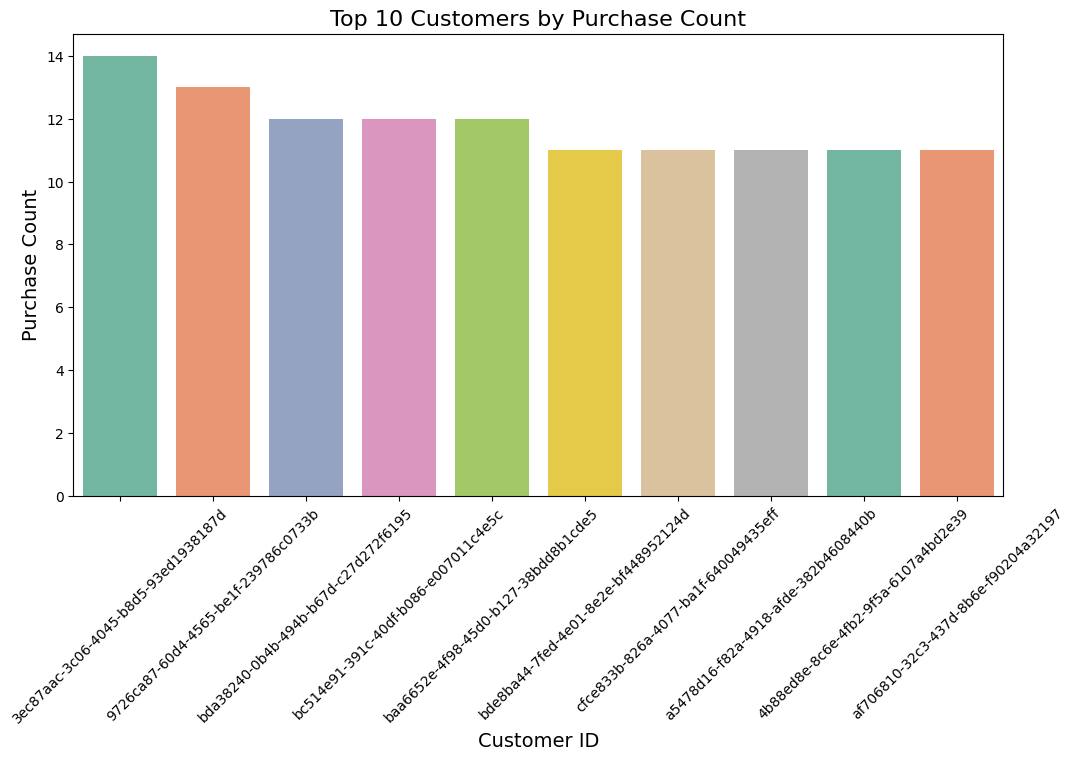

In [25]:
# Load the generated data
df_customers = pd.read_excel(file_path, sheet_name="customers")
df_orders = pd.read_excel(file_path, sheet_name="orders")
df_order_status = pd.read_excel(file_path, sheet_name="order_status")
df_geo_lookup = pd.read_excel(file_path, sheet_name="geo_lookup")

# Merge orders with order_status
df_orders_merged = pd.merge(df_orders, df_order_status, left_on='id', right_on='order_id')

# Renaming columns to avoid confusion
df_orders_merged.rename(columns={
    'purchase_ts_x': 'purchase_ts',
    'purchase_ts_y': 'order_purchase_ts'
}, inplace=True)

# Merge orders with customers
df_orders_customers_merged = df_orders_merged.merge(df_customers, left_on='customer_id', right_on='id', suffixes=('_order', '_customer'))
print(df_orders_customers_merged.columns)

# Sales Trends
sales_trends = df_orders_customers_merged.groupby(df_orders_customers_merged['purchase_ts'].dt.to_period('M')).agg(
    total_sales=('usd_price', 'sum'),
    total_orders=('id_order', 'count')
).reset_index()

# Product Trends
product_trends = df_orders_customers_merged.groupby('product_name').agg(
    total_sales=('usd_price', 'sum'),
    total_orders=('id_order', 'count')
).reset_index().sort_values(by='total_sales', ascending=False)

# Loyalty Program Insights
loyalty_program_insights = df_orders_customers_merged.groupby('loyalty_program').agg(
    total_sales=('usd_price', 'sum'),
    total_orders=('id_order', 'count'),
    unique_customers=('customer_id', 'nunique')
).reset_index()

# Refund Rates
refund_rates = df_orders_customers_merged.groupby(df_orders_customers_merged['refund_ts'].notnull()).agg(
    total_sales=('usd_price', 'sum'),
    total_orders=('id_order', 'count')
).reset_index().rename(columns={'refund_ts': 'is_refunded'})

# Step 4: Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the purchase_ts column is properly converted to datetime and to string for plotting
sales_trends['purchase_ts'] = sales_trends['purchase_ts'].astype(str)

# Sales Trends Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trends, x='purchase_ts', y='total_sales', marker='o', color='blue')
plt.title('Monthly Sales Trends', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Product Trends Visualization
plt.figure(figsize=(12, 6))
top_products = product_trends.head(10)
sns.barplot(data=top_products, x='product_name', y='total_sales', palette='viridis')
plt.title('Top 10 Products by Sales', fontsize=16)
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Loyalty Program Insights Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=loyalty_program_insights, x='loyalty_program', y='total_sales', palette='coolwarm')
plt.title('Sales by Loyalty Program', fontsize=16)
plt.xlabel('Loyalty Program (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.tight_layout()
plt.show()

# Refund Rates Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=refund_rates, x='is_refunded', y='total_sales', palette='magma')
plt.title('Sales by Refund Status', fontsize=16)
plt.xlabel('Refund Status (False = No, True = Yes)', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.tight_layout()
plt.show()

# Step 5: Additional Insights - Detailed Customer Insights

# 1. Purchase Frequency
purchase_frequency = df_orders_customers_merged.groupby('customer_id').agg(
    purchase_count=('id_order', 'count'),
    total_spent=('usd_price', 'sum')
).reset_index()

purchase_frequency['average_order_value'] = purchase_frequency['total_spent'] / purchase_frequency['purchase_count']

# Displaying the top 10 customers by purchase count
print("Top 10 Customers by Purchase Count:")
print(purchase_frequency.sort_values(by='purchase_count', ascending=False).head(10))

# Visualization of Purchase Frequency
plt.figure(figsize=(12, 6))
top_customers = purchase_frequency.sort_values(by='purchase_count', ascending=False).head(10)
sns.barplot(data=top_customers, x='customer_id', y='purchase_count', palette='Set2')
plt.title('Top 10 Customers by Purchase Count', fontsize=16)
plt.xlabel('Customer ID', fontsize=14)
plt.ylabel('Purchase Count', fontsize=14)
plt.xticks(rotation=45)


